In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob
from tqdm import tqdm
import numpy as np
import math
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# fnames  = glob('../Education/data/IPEDS/*_A/*_rv.csv')+glob('../data/IPEDS/*_a.csv')
# dfs     = []

# for fname in tqdm(fnames): 

#     year = int(fname.split('/')[-1].split('_')[0][1:])
#     if year <= 2001:
#         continue 

#     # unis        = pd.read_csv('hdfiles/hd%s.csv' % year, index_col=0)

#     df          = pd.read_csv(fname, index_col=0)
#     df          = df.rename(columns={col: col.upper().strip() for col in df.columns})
#     # df          = df[df['AWLEVEL'].apply(lambda x: x in [5, 7, 9, 17, 18, 19])]
#     df          = df[df['AWLEVEL']==5]
    
#     df['year']  = year
#     df['cs']    = df['CIPCODE'].apply(lambda x: (x>=11) & (x<12))
#     df['cs2']   = df['CIPCODE']==11.0701
#     df['mth']   = df['CIPCODE']==27.0101
#     df['bio']   = df['CIPCODE']==26.0101
#     # df['ugd']   = df['AWLEVEL'] == 5
#     # df['mst']   = df['AWLEVEL'] == 7
#     # df['phd']   = df['AWLEVEL'] >  7
    

#     dfs.append(df)

# all_dfs                     = pd.concat(dfs)
# all_dfs['white_abs']        = all_dfs[['CWHITT', 'CRACE22']].max(axis=1)
# all_dfs['white_men_abs']     = all_dfs[['CWHITM', 'CRACE11']].max(axis=1)
# all_dfs['white_women_abs']   = all_dfs[['CWHITW', 'CRACE12']].max(axis=1)
# all_dfs['women_abs']        = all_dfs[['CTOTALW', 'CRACE16']].max(axis=1)
# all_dfs['black_abs']        = all_dfs[['CBKAAT', 'CRACE18', 'DVCBKT']].max(axis=1)
# all_dfs['black_men_abs']    = all_dfs[['CBKAAM', 'CRACE03', 'DVCBKM']].max(axis=1) 
# all_dfs['black_women_abs']  = all_dfs[['CBKAAW', 'CRACE04', 'DVCBKW']].max(axis=1) 
# all_dfs['hisp_abs']         = all_dfs[['CRACE21', 'CHISPT','DVCHST']].max(axis=1)
# all_dfs['hisp_men_abs']     = all_dfs[['CRACE09', 'CHISPM','DVCHSM']].max(axis=1)
# all_dfs['hisp_women_abs']   = all_dfs[['CRACE10', 'CHISPW','DVCHSW']].max(axis=1)
# all_dfs['native_abs']       = all_dfs[['CAIANT', 'CRACE19']].max(axis=1)
# all_dfs['total_abs']        = all_dfs[['CRACE24', 'CTOTALT']].max(axis=1)

# # all_dfs.to_csv('all_years.csv', index=True)

# relevant_cols = ['CIPCODE', 'AWLEVEL', 'year', 'cs', 'cs2','mth', 'bio', \
#                  'white_abs', 'white_men_abs', 'white_women_abs', 'women_abs',
#                 'black_abs', 'black_men_abs', 'black_women_abs', 'hisp_abs',
#                 'hisp_men_abs', 'hisp_women_abs', 'native_abs', 'total_abs']#'UNITID',

# all_dfs[relevant_cols].to_csv('all_years_relevant.csv', index=True)

In [106]:
all_year_unis = unis.groupby('UNITID').apply(lambda x: x['year'].nunique()).sort_values()

all_year_unis = list(all_year_unis[all_year_unis==18].index)

In [108]:
unis    = pd.read_csv('all_insts.csv', index_col=0)
# nprofit = unis[unis['CONTROL'].isin([1, 2, 3])]
# nprofit = unis[unis['ICLEVEL'].isin([1, 2])]

# nprofit = list(nprofit['UNITID'].unique())

all_dfs     = pd.read_csv('all_years_relevant.csv')
# all_dfs = all_dfs[all_dfs['UNITID'].isin(nprofit)] 
all_dfs = all_dfs[all_dfs['UNITID'].isin(all_year_unis)] 

ugds_cs  = all_dfs.groupby(['year', 'cs']).sum().reset_index()
ugds_mth     = all_dfs.groupby(['year', 'mth']).sum().reset_index()
ugds_bio     = all_dfs.groupby(['year', 'bio']).sum().reset_index()

ugds_cs.set_index('year', inplace=True)
ugds_bio.set_index('year', inplace=True)
ugds_mth.set_index('year', inplace=True)

In [83]:
# all_dfs['CIPCODE2'] = all_dfs['CIPCODE'].apply(lambda x: int(str(x).split('.')[0]))
# all_sum = all_dfs.groupby('CIPCODE2').sum()
# all_sum.sort_values('white_men_abs', ascending=False)

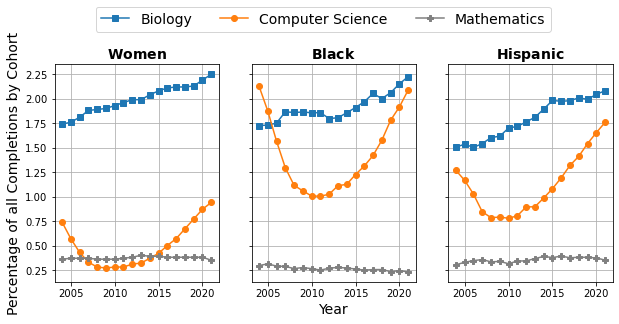

In [109]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharex=True, sharey=True)

women_bio_odds    = ugds_bio.groupby('year').apply(lambda x: 100*x[x['bio']]['women_abs'].sum()/x['women_abs'].sum())
women_cs_odds     = ugds_cs.groupby('year' ).apply(lambda x: 100*x[x['cs']]['women_abs'].sum() /x['women_abs'].sum())
women_mth_odds    = ugds_mth.groupby('year').apply(lambda x: 100*x[x['mth']]['women_abs'].sum()/x['women_abs'].sum())

# women_other_odds = ugds.drop('year', axis=1).groupby('year').apply(lambda x: x[~x['cs']]['women_abs'].sum()/x['women_abs'].sum())
black_cs_odds    = ugds_cs.groupby('year').apply(lambda x: 100*x[x['cs']]['black_abs'].sum()/x['black_abs'].sum())
black_bio_odds   = ugds_bio.groupby('year').apply(lambda x: 100*x[x['bio']]['black_abs'].sum()/x['black_abs'].sum())
black_mth_odds   = ugds_mth.groupby('year').apply(lambda x: 100*x[x['mth']]['black_abs'].sum()/x['black_abs'].sum())

hisp_cs_odds     = ugds_cs.groupby('year').apply(lambda x: 100*x[x['cs']]['hisp_abs'].sum()/x['hisp_abs'].sum())
hisp_bio_odds    = ugds_bio.groupby('year').apply(lambda x: 100*x[x['bio']]['hisp_abs'].sum()/x['hisp_abs'].sum())
hisp_mth_odds    = ugds_mth.groupby('year').apply(lambda x: 100*x[x['mth']]['hisp_abs'].sum()/x['hisp_abs'].sum())

axs[0].plot(women_bio_odds.round(2), label='Bio', marker='s')
axs[0].plot(women_cs_odds.round(2),  label='CS', marker='o')
axs[0].plot(women_mth_odds.round(2), label='Math', marker='P', color='gray')
axs[0].set_title(r'$\bf{Women}$', fontsize=14)
axs[0].grid()

axs[1].plot(black_bio_odds, label='Bio', marker='s')
axs[1].plot(black_cs_odds, label='CS', marker='o')
axs[1].plot(black_mth_odds, label='Math', marker='P', color='gray')
axs[1].set_title(r'$\bf{Black}$', fontsize=14)
axs[1].grid()

axs[2].plot(hisp_bio_odds, marker='s', label='Bio')
axs[2].plot(hisp_cs_odds,  marker='o', label='CS')
axs[2].plot(hisp_mth_odds, marker='P', label='Math', color='gray')
axs[2].set_title(r'$\bf{Hispanic}$', fontsize=14)
axs[2].grid()

axs[1].set_xlabel('Year', fontsize=14)
axs[0].set_ylabel('Percentage of all Completions by Cohort', fontsize=14)

axs[0].legend(['Biology', 'Computer Science', 'Mathematics'], fontsize=14, loc=(0.25, 1.15), ncol=3);

# axs[0].xaxis.set_tick_params(labelsize=14)
# axs[1].xaxis.set_tick_params(labelsize=14)
# axs[2].xaxis.set_tick_params(labelsize=14)  

# axs[0].yaxis.set_tick_params(labelsize=14)
# axs[1].yaxis.set_tick_params(labelsize=14)
# axs[2].yaxis.set_tick_params(labelsize=14)

In [110]:
uni_stats = all_dfs.groupby(['UNITID', 'year']).apply(lambda x: pd.Series({\
    'women_odds':x[x['cs']]['women_abs'].sum() / x['women_abs'].sum(),\
    'black_odds':x[x['cs']]['black_abs'].sum() / x['black_abs'].sum(),\
    'hisp_odds': x[x['cs']]['hisp_abs'].sum()  / x['hisp_abs'].sum(), \
    })).reset_index()

women_error = uni_stats.groupby('year').apply(lambda x: pd.Series({'mean':x['women_odds'].mean(), 'sem': x['women_odds'].sem()}))
black_error = uni_stats.groupby('year').apply(lambda x: pd.Series({'mean':x['black_odds'].mean(), 'sem': x['black_odds'].sem()}))
hisp_error  = uni_stats.groupby('year').apply(lambda x: pd.Series({'mean':x['hisp_odds'].mean(), 'sem': x['hisp_odds'].sem()}))

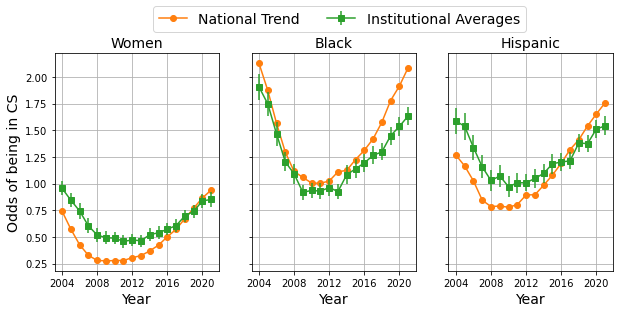

In [111]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)

axs[0].set_title('Women', fontsize=14)
axs[0].plot(women_cs_odds, marker='o', color='#ff7f0e')
axs[0].errorbar(women_error.index, 100*women_error['mean'], yerr=100*women_error['sem'], marker='s', color='#2ca02c')
axs[0].grid()
axs[0].set_xlabel('Year', fontsize=14)

axs[1].set_title('Black', fontsize=14)
axs[1].plot(black_cs_odds, marker='o', color='#ff7f0e')
axs[1].errorbar(black_error.index, 100*black_error['mean'], yerr=100*black_error['sem'], marker='s', color='#2ca02c')
axs[1].grid()
axs[1].set_xlabel('Year', fontsize=14)

axs[2].set_title('Hispanic', fontsize=14)
axs[2].plot(hisp_cs_odds, marker='o', color='#ff7f0e')
axs[2].errorbar(hisp_error.index, 100*hisp_error['mean'], yerr=100*hisp_error['sem'], marker='s', color='#2ca02c')
axs[2].grid()
axs[2].set_xlabel('Year', fontsize=14)

axs[0].xaxis.set_major_locator(plt.MaxNLocator(6))
axs[0].set_ylabel('Odds of being in CS', fontsize=14)

# plt.yscale('log')

axs[0].legend(['National Trend', 'Institutional Averages'], ncol=2, loc=(0.6, 1.1), fontsize=14);

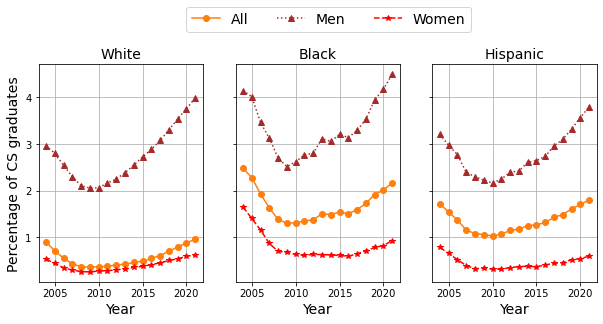

In [72]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True)

ww_cs_odds = ugds_cs.groupby('year').apply(lambda x: x[x['cs']]['white_women_abs'].sum()/x['white_women_abs'].sum())
wm_cs_odds = ugds_cs.groupby('year').apply(lambda x: x[x['cs']]['white_men_abs'].sum()/x['white_men_abs'].sum())

bm_cs_odds = ugds_cs.groupby('year').apply(lambda x: x[x['cs']]['black_men_abs'].sum()/x['black_men_abs'].sum())
bw_cs_odds = ugds_cs.groupby('year').apply(lambda x: x[x['cs']]['black_women_abs'].sum()/x['black_women_abs'].sum())

hm_cs_odds = ugds_cs.groupby('year').apply(lambda x: x[x['cs']]['hisp_men_abs'].sum()/x['hisp_men_abs'].sum())
hw_cs_odds = ugds_cs.groupby('year').apply(lambda x: x[x['cs']]['hisp_women_abs'].sum()/x['hisp_women_abs'].sum())

axs[0].plot(women_cs_odds, marker='o', color='#ff7f0e')
axs[0].plot(100*wm_cs_odds, marker='^', label='Men', color='brown', linestyle=':')
axs[0].plot(100*ww_cs_odds, marker='*', label='Women', color='red', linestyle='--')
axs[0].legend()
axs[0].set_title('White', fontsize=14);
axs[0].set_xlabel('Year', fontsize=14);

axs[1].plot(black_cs_odds, marker='o', color='#ff7f0e')
axs[1].plot(100*bm_cs_odds, marker='^', label='Men', color='brown', linestyle=':')
axs[1].plot(100*bw_cs_odds, marker='*', label='Women', color='red', linestyle='--')
axs[1].set_title('Black', fontsize=14);
axs[1].set_xlabel('Year', fontsize=14);

axs[2].plot(hisp_cs_odds, marker='o', color='#ff7f0e')
axs[2].plot(100*hm_cs_odds, marker='^', label='Men', color='brown', linestyle=':')
axs[2].plot(100*hw_cs_odds, marker='*', label='Women', color='red', linestyle='--')
axs[2].set_title('Hispanic', fontsize=14);
axs[2].set_xlabel('Year', fontsize=14);

axs[0].legend(['All', 'Men', 'Women'], ncol=3, loc=(0.9, 1.15), fontsize=14)

# axs[0].set_yscale('log')
axs[0].grid()
axs[1].grid()
axs[2].grid()

axs[0].set_ylabel('Percentage of CS graduates', fontsize=14);

# axs[0].set_yticks([1, 2, 3, 4, 5, 6])
# axs[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

In [113]:
uni_stats = all_dfs.groupby(['UNITID', 'year']).apply(lambda x: pd.Series({\
        'black_men_odds':   x[x['cs']]['black_men_abs'].sum()   / x['black_men_abs'].sum(),  \
        'black_women_odds': x[x['cs']]['black_women_abs'].sum() / x['black_women_abs'].sum(),\
        'black_odds':       x[x['cs']]['black_abs'].sum()       / x['black_abs'].sum(),      \
        'hisp_odds':        x[x['cs']]['hisp_abs'].sum()        / x['hisp_abs'].sum(),       \
        'hisp_men_odds':    x[x['cs']]['hisp_men_abs'].sum()    / x['hisp_men_abs'].sum(),   \
        'hisp_women_odds':  x[x['cs']]['hisp_women_abs'].sum()  / x['hisp_women_abs'].sum(), \
    })).reset_index()

uni_stats.head()

,UNITID,year,black_men_odds,black_women_odds,black_odds,hisp_odds,hisp_men_odds,hisp_women_odds
0,100654,2004,0.051813,0.032641,0.039623,0.000000,NaN,0.0
1,100654,2005,0.043860,0.030581,0.036036,0.000000,0.000,0.0
2,100654,2006,0.040948,0.022801,0.030612,0.083333,0.125,0.0
3,100654,2007,0.024887,0.019298,0.021739,NaN,NaN,NaN
4,100654,2008,0.032787,0.008955,0.018998,0.000000,0.000,0.0


Text(0.5, 1.0, 'Hisp Women')

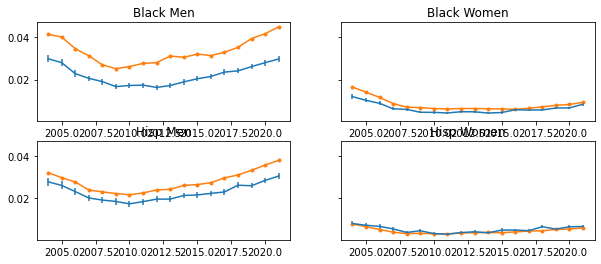

In [114]:
black_women_error = uni_stats.groupby('year').apply(lambda x: pd.Series({'mean':x['black_women_odds'].mean(), 'sem': x['black_women_odds'].sem()}))
black_men_error   = uni_stats.groupby('year').apply(lambda x: pd.Series({'mean':x['black_men_odds'].mean(),   'sem': x['black_men_odds'].sem()}))
hisp_men_error    = uni_stats.groupby('year').apply(lambda x: pd.Series({'mean':x['hisp_men_odds'].mean(),    'sem': x['hisp_men_odds'].sem()}))
hisp_women_error  = uni_stats.groupby('year').apply(lambda x: pd.Series({'mean':x['hisp_women_odds'].mean(),  'sem': x['hisp_women_odds'].sem()}))
# black_error = uni_stats.groupby('year').apply(lambda x: pd.Series({'mean':x['black_odds'].mean(), 'sem': x['black_odds'].sem()}))
# hisp_error  = uni_stats.groupby('year').apply(lambda x: pd.Series({'mean':x['hisp_odds'].mean(), 'sem': x['hisp_odds'].sem()}))

fig, axs = plt.subplots(2, 2, figsize=(10, 4), sharey=True)

axs = axs.flatten()

axs[0].errorbar(black_men_error.index, black_men_error['mean'], yerr=black_men_error['sem'])
axs[0].plot(bm_cs_odds, marker='.', label='Black Women')
axs[0].set_title('Black Men')

axs[1].errorbar(black_women_error.index, black_women_error['mean'], yerr=black_women_error['sem'])
axs[1].plot(bw_cs_odds, marker='.', label='Black Women')
axs[1].set_title('Black Women')


axs[2].errorbar(hisp_men_error.index, hisp_men_error['mean'], yerr=hisp_men_error['sem'])
axs[2].plot(hm_cs_odds, marker='.', label='Hisp Women')
axs[2].set_title('Hisp Men')

axs[3].errorbar(hisp_women_error.index, hisp_women_error['mean'], yerr=hisp_women_error['sem'])
axs[3].plot(hw_cs_odds, marker='.', label='Hisp Women')
axs[3].set_title('Hisp Women')





# Region

In [4]:
unis    = pd.read_csv('all_insts.csv', index_col=0)

In [37]:
regions_map = {1: 'New England', 2: 'Mid East', 3: 'Great Lakes', 4: 'Plains', 5: 'Southeast', 6: 'Southwest', 7: 'Rocky Mountains', 8: 'Far West', 9: 'Outlying Areas'}

carnegie_map = {15: "Doctoral/Research Universities--Extensive",\
    16 :"Doctoral/Research Universities--Intensive",\
    21 :"Masters Colleges and Universities I",\
    22 :"Masters (Comprehensive) Colleges and Universities II",\
    31 :"Baccalaureate Colleges--Liberal Arts",\
    32 :"Baccalaureate Colleges--General",\
    33 :"Baccalaureate/Associates Colleges",\
    40 :"Associates Colleges",\
    51 :"Theological seminaries and other specialized faith-related institutions",\
    52 :"Medical schools and medical centers",\
    53 :"Other separate health profession schools",\
    54 :"Schools of engineering and technology",\
    55 :"Schools of business and management",\
    56 :"Schools of art, music, and design",\
    57 :"Schools of law",\
    58 :"Teachers colleges",\
    59 :"Other specialized institutions",\
    60 :"Tribal Colleges and Universities"}

In [49]:
region_df['women_abs']

Series([], Name: women_abs, dtype: float64)

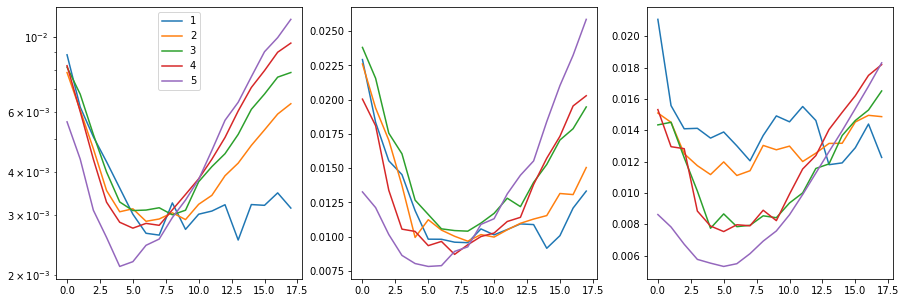

In [59]:
col = 'INSTSIZE'
# col = 'CARNEGIE'

unis_regions = unis[[col, 'UNITID']]
merged = pd.merge(all_dfs, unis_regions, on='UNITID')

unique_vals = list(merged[col].unique())

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

# axs = axs.flatten()

for i, val in enumerate([1, 2, 3, 4, 5]): 
    if val < 0: 
        continue
    region_df = merged[merged[col]==val]
    if len(region_df)==0:
        continue
    region_df = region_df.groupby(['year', 'cs']).sum().reset_index()
    region_df.set_index('year', inplace=True)
    region_stats = region_df.groupby('year').apply(lambda x: pd.Series({\
        'women_odds':x[x['cs']]['women_abs'].sum() / x['women_abs'].sum(),\
        'black_odds':x[x['cs']]['black_abs'].sum() / x['black_abs'].sum(),\
        'hisp_odds': x[x['cs']]['hisp_abs'].sum()  / x['hisp_abs'].sum(), \
        })).reset_index()
    
    # axs[i].set_title(regions_map[region])
    # axs[i].set_title(carnegie_map[val])
    # axs[i].set_title(val)
    
    axs[0].plot(region_stats['women_odds'], label=val)
    axs[1].plot(region_stats['black_odds'], label=val)
    axs[2].plot(region_stats['hisp_odds'],  label=val)

axs[0].legend()

axs[0].set_yscale('log')

In [ ]:


women_error = uni_stats.groupby('year').apply(lambda x: pd.Series({'mean':x['women_odds'].mean(), 'sem': x['women_odds'].sem()}))
black_error = uni_stats.groupby('year').apply(lambda x: pd.Series({'mean':x['black_odds'].mean(), 'sem': x['black_odds'].sem()}))
hisp_error  = uni_stats.groupby('year').apply(lambda x: pd.Series({'mean':x['hisp_odds'].mean(), 'sem': x['hisp_odds'].sem()}))